In [1]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import datetime

In [2]:
# importing required libraries
import pandas as pd
import numpy as np

# Now, we will load the data set and look at some initial rows and data types of the columns:
ts_data = pd.read_csv('C:\\Users\\Recherche\\Desktop\\Average.csv')
print (ts_data.head())
print ('\n Data Types:')
print (ts_data.dtypes)


   user_count size of data     time  cpu_percent_1 worker per core
0           5       147 MB  8:16:01                         99.225
1           5       147 MB  8:16:53                         99.175
2           5       147 MB  8:17:06                        100.195
3           5       147 MB  8:17:19                        101.335
4           5       147 MB  8:17:32                         99.175

 Data Types:
user_count                         int64
size of data                      object
time                              object
cpu_percent_1 worker per core    float64
dtype: object


In [17]:
ts_data.head()

,user_count,size of data,cpu_percent_1 worker per core
time,,,
2022-06-16 08:16:01,5,147 MB,99.225
2022-06-16 08:16:53,5,147 MB,99.175
2022-06-16 08:17:06,5,147 MB,100.195
2022-06-16 08:17:19,5,147 MB,101.335
2022-06-16 08:17:32,5,147 MB,99.175


In [18]:
ts_data = pd.read_csv('C:\\Users\\Recherche\\Desktop\\Average.csv',index_col='time',parse_dates=True)

In [19]:
ts_data.head()

,user_count,size of data,cpu_percent_1 worker per core
time,,,
2022-06-16 08:16:01,5,147 MB,99.225
2022-06-16 08:16:53,5,147 MB,99.175
2022-06-16 08:17:06,5,147 MB,100.195
2022-06-16 08:17:19,5,147 MB,101.335
2022-06-16 08:17:32,5,147 MB,99.175


In [21]:
# To show that dates are already parsed
ts_data.index

DatetimeIndex(['2022-06-16 08:16:01', '2022-06-16 08:16:53',
               '2022-06-16 08:17:06', '2022-06-16 08:17:19',
               '2022-06-16 08:17:32', '2022-06-16 08:17:45',
               '2022-06-16 08:17:58', '2022-06-16 08:18:11',
               '2022-06-16 08:18:37', '2022-06-16 08:18:50',
               ...
               '2022-06-16 09:33:14', '2022-06-16 09:33:27',
               '2022-06-16 09:33:40', '2022-06-16 09:33:53',
               '2022-06-16 09:34:06', '2022-06-16 09:34:19',
               '2022-06-16 09:34:32', '2022-06-16 09:34:45',
               '2022-06-16 09:34:58', '2022-06-16 09:35:11'],
              dtype='datetime64[ns]', name='time', length=361, freq=None)

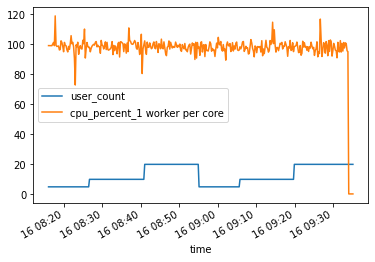

In [22]:
ts_data.plot();

In [28]:
train_data = ts_data.iloc[:300] # Goes up to but not including 108
test_data = ts_data.iloc[300:]

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['cpu_percent_1 worker per core'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [30]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [31]:
test_predictions

300    98.253036
301    98.199858
302    98.148432
303    97.928728
304    96.909681
305    98.105960
306    97.708438
307    97.349490
308    98.155038
309    98.167962
310    97.642574
311    99.260888
312    98.218160
313    98.165001
314    98.113593
315    97.893967
316    96.875282
317    98.071136
318    97.673755
319    97.314934
320    98.120197
321    98.133116
322    97.607914
323    99.225654
324    98.183296
325    98.130156
326    98.078766
327    97.859219
328    96.840895
329    98.036324
330    97.639085
331    97.280391
332    98.085368
333    98.098283
334    97.573267
335    99.190433
Name: HW Forecast, dtype: float64

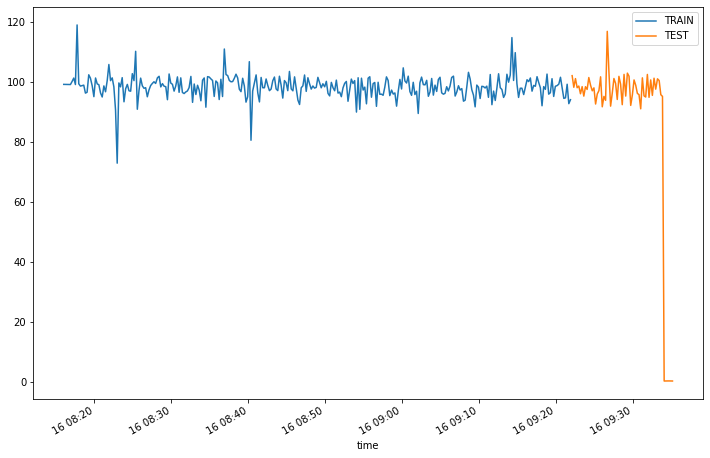

In [32]:
train_data['cpu_percent_1 worker per core'].plot(legend=True,label='TRAIN')
test_data['cpu_percent_1 worker per core'].plot(legend=True,label='TEST',figsize=(12,8));

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
test_data.describe()

,user_count,cpu_percent_1 worker per core
count,61.0,61.000000
mean,20.0,88.484344
std,0.0,29.639733
min,20.0,0.270000
25%,20.0,95.005000
50%,20.0,97.140000
75%,20.0,100.710000
max,20.0,116.915000


In [41]:
final_model = ExponentialSmoothing(ts_data['cpu_percent_1 worker per core'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [42]:
forecast_predictions = final_model.forecast(36)